<a href="https://colab.research.google.com/github/harrynguyen14/Sentiment-Analysis/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import nltk
import re 
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from wordcloud import WordCloud 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import re
import nltk
from nltk import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

##Data Exploring

In [ ]:
val_data = pd.read_csv("/content/drive/MyDrive/Twitter Sentiment Analysis/twitter/twitter_validation.csv")

train_data = pd.read_csv("/content/drive/MyDrive/Twitter Sentiment Analysis/twitter/twitter_training.csv")

names = ['id','information','Sentiment','Tweet_content']

In [ ]:
val_data.shape

(999, 4)

In [ ]:
train_data.shape

(74681, 4)

In [ ]:
val_data.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [ ]:
train_data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [ ]:
train_data.columns=['id','information','Sentiment','Tweet_content']
train_data.head()

,id,information,Sentiment,Tweet_content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [ ]:
val_data.columns=['id','information','Sentiment','Tweet_content']
val_data.head()

,id,information,Sentiment,Tweet_content
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [ ]:
train_data["lower"]=train_data.Tweet_content.str.lower() #lowercase
train_data["lower"]=[str(data) for data in train_data.lower] #converting all to string
train_data["lower"]=train_data.lower.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x)) #regex
val_data["lower"]=val_data.Tweet_content.str.lower() #lowercase
val_data["lower"]=[str(data) for data in val_data.lower] #converting all to string
val_data["lower"]=val_data.lower.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x)) #regex

In [ ]:
train_data.head()

,id,information,Sentiment,Tweet_content,lower
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,im getting into borderlands and i can murder y...


##Data Cleaning

In [ ]:
train_data.duplicated().sum()

2700

In [ ]:
train_data.drop_duplicates(inplace=True)

In [ ]:
train_data.duplicated().sum()

0

In [ ]:
train_data.isnull().sum()

id                 0
information        0
Sentiment          0
Tweet_content    326
lower              0
dtype: int64

In [116]:
train_data.dropna(axis=0, inplace=True)

In [ ]:
train_data.isnull().sum()

id               0
information      0
Sentiment        0
Tweet_content    0
lower            0
dtype: int64

In [ ]:
train_data.reset_index(inplace=True)

In [ ]:
train_data.shape

(71655, 6)

In [ ]:
val_data.duplicated().sum()

0

In [ ]:
val_data.drop_duplicates(inplace=True)

In [ ]:
val_data.duplicated().sum()

0

In [ ]:
val_data.isnull().sum()

id               0
information      0
Sentiment        0
Tweet_content    0
lower            0
dtype: int64

In [ ]:
val_data.dropna(axis=0, inplace=True)

In [ ]:
val_data.isnull().sum()

id               0
information      0
Sentiment        0
Tweet_content    0
lower            0
dtype: int64

In [ ]:
val_data.reset_index(inplace=True)

In [ ]:
val_data.shape

(999, 6)

##Plotting features

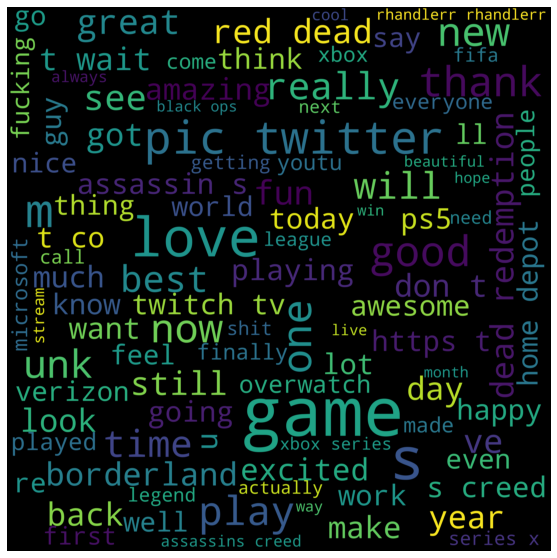

In [ ]:
word_cloud_text = ''.join(train_data[train_data["Sentiment"]=="Positive"].lower)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

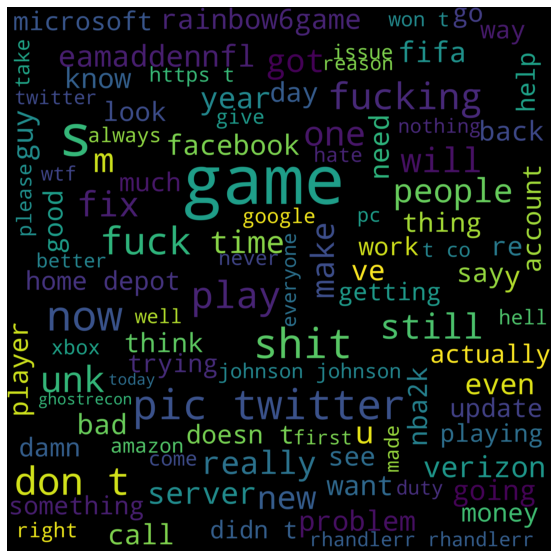

In [ ]:
word_cloud_text = ''.join(train_data[train_data["Sentiment"]=="Negative"].lower)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

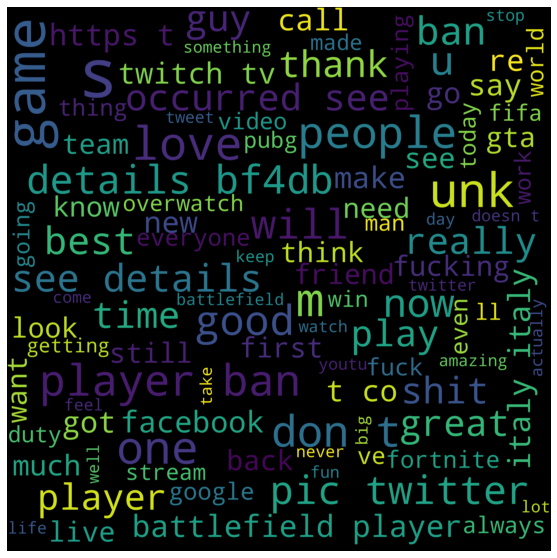

In [ ]:
word_cloud_text = ''.join(train_data[train_data["Sentiment"]=="Irrelevant"].lower)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

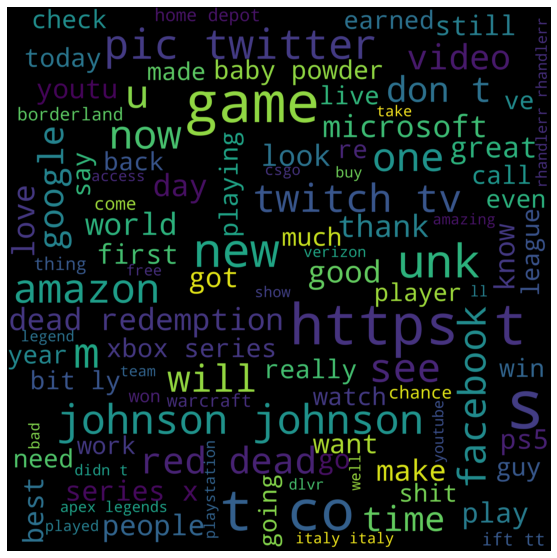

In [ ]:
word_cloud_text = ''.join(train_data[train_data["Sentiment"]=="Neutral"].lower)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
plot1=train_data.groupby(by=["information","Sentiment"]).count().reset_index()
plot1.head()

,information,Sentiment,index,id,Tweet_content,lower
0,Amazon,Irrelevant,185,185,185,185
1,Amazon,Negative,565,565,565,565
2,Amazon,Neutral,1197,1197,1197,1197
3,Amazon,Positive,302,302,302,302
4,ApexLegends,Irrelevant,185,185,185,185


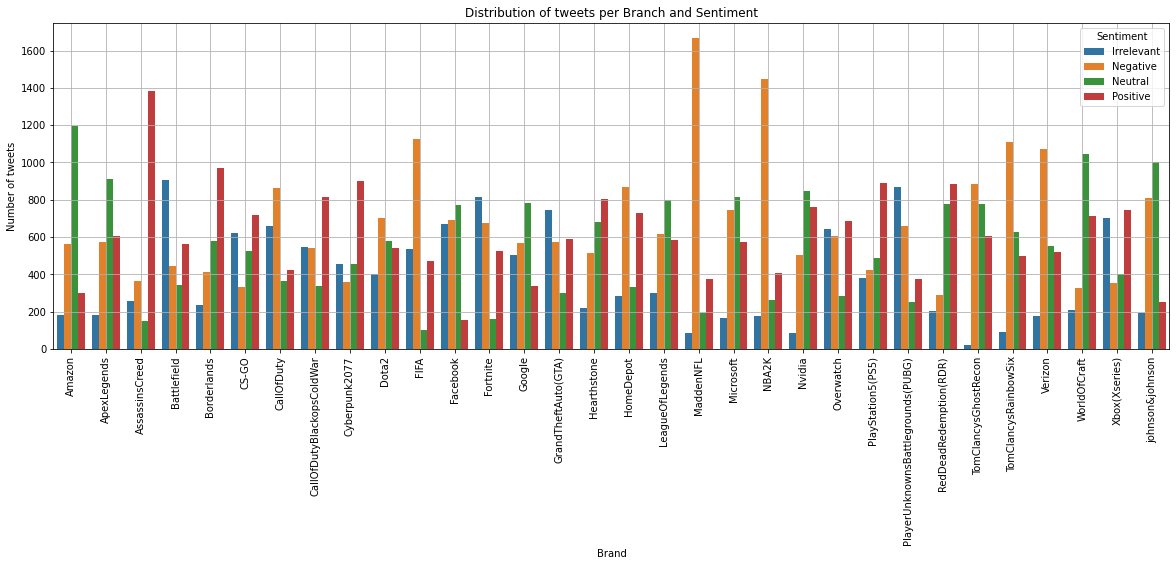

In [ ]:
plt.figure(figsize=(20,6))
sns.barplot(data=plot1,x="information",y="id",hue="Sentiment")
plt.xticks(rotation=90)
plt.xlabel("Brand")
plt.ylabel("Number of tweets")
plt.grid()
plt.title("Distribution of tweets per Branch and Sentiment");

##Text Analysis

In [ ]:
tokens_text = [word_tokenize(str(word)) for word in train_data.lower]

tokens_counter = [item for sublist in tokens_text for item in sublist]
print("Number of tokens: ", len(set(tokens_counter)))

Number of tokens:  30435


In [ ]:
tokens_text[1]

['im',
 'getting',
 'on',
 'borderlands',
 'and',
 'i',
 'will',
 'kill',
 'you',
 'all']

In [ ]:
stopwords_nltk = nltk.corpus.stopwords
stop_words = stopwords_nltk.words('english')
stop_words[:5]

['i', 'me', 'my', 'myself', 'we']

In [ ]:
def clean_text(text):
    text = text.lower()
    for s in tokens_text:
        text = text.replace(s, tokens_text[s])
    text = ' '.join(text.split())
    return text

In [ ]:
x = train_data['Tweet_content']

In [ ]:
x[20]

'that I was the first real borderlands session in a nice long wait time where i actually had a really satisfying combat experience. and i got some really good kills'

#Logistic Regression

##n-gram of 1 words

In [ ]:
bow_counts = CountVectorizer(
    tokenizer=word_tokenize,
    stop_words=stop_words, 
    ngram_range=(1, 1) 
)

In [ ]:
reviews_train, reviews_test = train_test_split(train_data, test_size=0.2, random_state=0)

In [ ]:
X_train_bow = bow_counts.fit_transform(reviews_train.lower)
X_test_bow = bow_counts.transform(reviews_test.lower)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  % sorted(inconsistent)


In [ ]:
X_test_bow

<14331x29023 sparse matrix of type '<class 'numpy.int64'>'
	with 159441 stored elements in Compressed Sparse Row format>

In [ ]:
y_train_bow = reviews_train['Sentiment']
y_test_bow = reviews_test['Sentiment']

In [ ]:
y_test_bow.value_counts() / y_test_bow.shape[0]

Negative      0.306957
Positive      0.269067
Neutral       0.243319
Irrelevant    0.180657
Name: Sentiment, dtype: float64

In [ ]:
LR = LogisticRegression(solver="liblinear")
LR.fit(X_train_bow, y_train_bow)

test_pred = LR.predict(X_test_bow)
print("Accuracy: ", accuracy_score(y_test_bow, test_pred))

Accuracy:  0.8194822412950945


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
X_val_bow = bow_counts.transform(val_data.lower)
y_val_bow = val_data['Sentiment']

In [ ]:
X_val_bow

<999x29023 sparse matrix of type '<class 'numpy.int64'>'
	with 12896 stored elements in Compressed Sparse Row format>

In [ ]:
Val_res = LR.predict(X_val_bow)
print("Accuracy: ", accuracy_score(y_val_bow, Val_res))

Accuracy:  0.918918918918919


##n-gram of 4 words

In [ ]:
bow_counts = CountVectorizer(
    tokenizer=word_tokenize,
    ngram_range=(1,4)
)

X_train_bow = bow_counts.fit_transform(reviews_train.lower)
X_test_bow = bow_counts.transform(reviews_test.lower)
X_val_bow = bow_counts.transform(val_data.lower)

In [ ]:
X_train_bow

<57324x1424085 sparse matrix of type '<class 'numpy.int64'>'
	with 4068136 stored elements in Compressed Sparse Row format>

In [ ]:
LR2 = LogisticRegression(solver="liblinear")

LR2.fit(X_train_bow, y_train_bow)

test_pred_2 = LR2.predict(X_test_bow)
print("Accuracy: ", accuracy_score(y_test_bow, test_pred_2))

Accuracy:  0.9038448119461308


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
y_val_bow = val_data['Sentiment']
Val_pred_2 = LR2.predict(X_val_bow)
print("Accuracy: ", accuracy_score(y_val_bow, Val_pred_2))

Accuracy:  0.9819819819819819


#Using LSTM

In [ ]:
from nltk.stem.porter import PorterStemmer
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, GlobalMaxPooling1D, SpatialDropout1D

In [ ]:
import re 
REPLACE_WITH_SPACE = re.compile("(@)")
SPACE = " "
from nltk.corpus import stopwords
english_stop_words = stopwords.words('english')
from nltk.stem.porter import PorterStemmer
#1
def reviews(reviews):  
    reviews = [REPLACE_WITH_SPACE.sub(SPACE, line.lower()) for line in reviews]
    
    return reviews
#2
def remove_stop_words(corpus):
    removed_stop_words = []
    for review in corpus:
        removed_stop_words.append(
            ' '.join([word for word in review.split()  if word not in english_stop_words]))
    return removed_stop_words
#3
def get_stemmed_text(corpus):
    stemmer = PorterStemmer()

    return [' '.join([stemmer.stem(word) for word in review.split()]) for review in corpus]

In [ ]:
y = train_data['Sentiment']

In [ ]:
#1
reviewtweet = reviews(x)
#2
no_stop_words_tweet = remove_stop_words(reviewtweet)
#3
stemmed_reviews_tweet = get_stemmed_text(no_stop_words_tweet)

In [ ]:
stemmed_reviews_tweet[20]

'first real borderland session nice long wait time actual realli satisfi combat experience. got realli good kill'

##Encoding

In [ ]:
max_words = 8000

tokenizer = Tokenizer(
    num_words = max_words,
    filters = '"#$%&()*+-/:;<=>@[\]^_`{|}~'
)
tokenizer.fit_on_texts(stemmed_reviews_tweet)
x = tokenizer.texts_to_sequences(stemmed_reviews_tweet)
x = pad_sequences(x, maxlen = 300)
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(y)

y = np.array(label_tokenizer.texts_to_sequences(y))

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8)

In [ ]:
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim = max_words, output_dim = 128, input_length = 300))
model_lstm.add(SpatialDropout1D(0.3))
model_lstm.add(LSTM(128, dropout = 0.3, recurrent_dropout = 0.3))
model_lstm.add(Dense(128, activation = 'relu'))
model_lstm.add(Dropout(0.3))
model_lstm.add(Dense(5, activation = 'softmax'))
model_lstm.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)

In [ ]:
history = model_lstm.fit(
    x_train,
    y_train,
    validation_data=(x_test,y_test) , 
    epochs = 10,
    batch_size = 512
)

Epoch 1/10
112/112 [==============================] - 717s 6s/step - loss: 1.2908 - accuracy: 0.4075 - val_loss: 1.0252 - val_accuracy: 0.5666
Epoch 2/10
112/112 [==============================] - 698s 6s/step - loss: 0.8523 - accuracy: 0.6655 - val_loss: 0.7538 - val_accuracy: 0.7047
Epoch 3/10
112/112 [==============================] - 718s 6s/step - loss: 0.6689 - accuracy: 0.7436 - val_loss: 0.6895 - val_accuracy: 0.7321
Epoch 4/10
112/112 [==============================] - 703s 6s/step - loss: 0.5878 - accuracy: 0.7750 - val_loss: 0.6573 - val_accuracy: 0.7471
Epoch 5/10
112/112 [==============================] - 702s 6s/step - loss: 0.5303 - accuracy: 0.7972 - val_loss: 0.6194 - val_accuracy: 0.7648
Epoch 6/10
112/112 [==============================] - 713s 6s/step - loss: 0.4812 - accuracy: 0.8163 - val_loss: 0.6052 - val_accuracy: 0.7767
Epoch 7/10
112/112 [==============================] - 700s 6s/step - loss: 0.4431 - accuracy: 0.8291 - val_loss: 0.5821 - val_accuracy: 0.7857

In [ ]:
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 128)          1024000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 300, 128)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                        

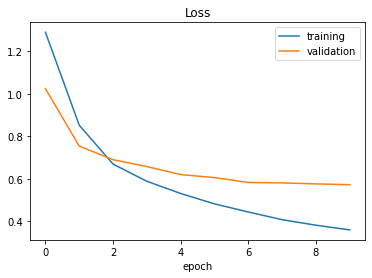

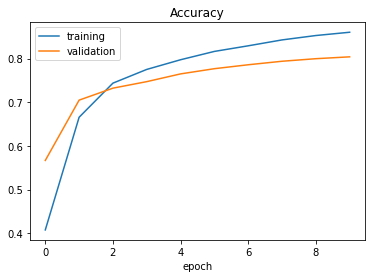

In [ ]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.show()